###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('../NODOS_FILTRADOS_base2(enfoque_llamadas).csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,FECHA,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,33110.000000,33110.000000,33110.000000,33110.000000,33110.00000,33110.0,33110.000000,33110.000000,33110.000000,33110.000000,...,33110.000000,33110.0,32837.000000,24210.000000,32970.000000,33110.000000,33110.000000,32843.000000,33058.000000,33110.000000
mean,6.000000,346.737391,0.471368,0.219964,0.70447,0.0,0.197463,0.556811,0.246904,0.143431,...,0.015203,11.0,1.121190,0.977127,1.203535,0.064959,0.006932,0.939373,0.530226,0.368277
std,3.162325,127.979069,0.731004,0.487390,0.90557,0.0,0.473879,0.829888,0.507950,0.385872,...,0.008168,0.0,0.841582,0.183071,0.497725,0.041724,0.009491,0.587523,0.141458,0.088019
min,1.000000,67.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.001466,11.0,0.001073,0.464753,0.130435,0.000000,0.000000,0.001944,0.000000,0.113691
25%,3.000000,258.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.009479,11.0,0.509546,0.847321,0.867209,0.033981,0.000000,0.502863,0.428710,0.304807
50%,6.000000,329.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.013913,11.0,0.915530,0.963110,1.114215,0.056818,0.003594,0.838239,0.528716,0.356208
75%,9.000000,416.000000,1.000000,0.000000,1.00000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.019417,11.0,1.547715,1.096842,1.430497,0.087065,0.009780,1.301638,0.631619,0.415194
max,11.000000,1366.000000,8.000000,5.000000,9.00000,0.0,8.000000,12.000000,5.000000,3.000000,...,0.111588,11.0,5.543854,1.516707,3.905138,0.246479,0.062201,3.143584,0.901423,0.659483


In [13]:
data_c0.columns

Index(['FECHA', 'COD_NODO', 'CANT_USER', 'CONGELACION', 'VIAJES',
       'CAPACIDAD_DE_PAGO', 'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO',
       'NO_UTILIZAR', 'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'OTROS',
       'Total_Bajas', 'ind_churn', 'nMeses', 'ALFA', 'ALFA_tarifa', 'BETA',
       'Llamadas_Admin_3M', 'Llamadas_Tecn_3M', 'MEGA', 'OCUPACION_DW',
       'PENETRACION', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO'],
      dtype='object')

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
#columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [17]:
data_c0['ind_churn']

0        0.016722
1        0.021739
2        0.023438
3        0.005556
4        0.009804
           ...   
33105    0.006726
33106    0.026087
33107    0.014286
33108    0.007463
33109    0.011186
Name: ind_churn, Length: 33110, dtype: float64

In [18]:
#data_c0['BAJAS_1.TOTAL'].sum()
#data_c0['BAJAS_31.@_VOL'].sum()


In [19]:
#data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']


In [20]:
data_c0['COD_NODO'].value_counts().min()

11

In [21]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [22]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,2879.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [23]:
data_c0['COD_NODO'].nunique()

2879

In [24]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [25]:
res_nodo['val_ind'].value_counts()

0    2879
Name: val_ind, dtype: int64

In [26]:
# TODA LA DATA
#data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [27]:
data_c0['COD_NODO'].nunique()

2879

# Val Configuraciones

In [28]:
DataSetEntregable_totales=pd.DataFrame()

In [29]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [30]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [32]:
RV_nal_c0=dic_corr_ind(data_c0)

In [33]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

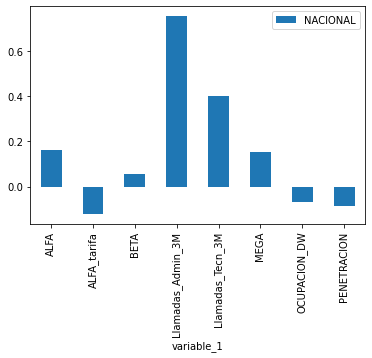

In [34]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [35]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [36]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [37]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,0.18693,-0.111164,0.07423,0.804333,0.42284,0.177693,-0.079545,-0.038556
2,0.187349,-0.154839,0.055822,0.794941,0.390246,0.190869,-0.067776,-0.049777
3,0.170747,-0.155156,0.041995,0.787995,0.410638,0.177147,-0.066383,-0.067097
4,0.139167,-0.10239,0.017141,0.799753,0.430186,0.150931,-0.063501,-0.07693
5,0.15289,-0.122575,0.044732,0.77394,0.397145,0.148788,-0.094461,-0.111023
6,0.177279,-0.120816,0.062726,0.783184,0.406586,0.164417,-0.080326,-0.125272
7,0.132118,-0.106451,0.019939,0.774483,0.407074,0.145398,-0.063674,-0.098842
8,0.178885,-0.139937,0.037434,0.792544,0.390431,0.182627,-0.043287,-0.078757
9,0.169598,-0.068094,0.01263,0.790303,0.40114,0.171607,-0.11004,-0.093955
10,0.149965,-0.017123,-0.020825,0.795972,0.404604,0.178917,-0.025274,-0.073346


In [39]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

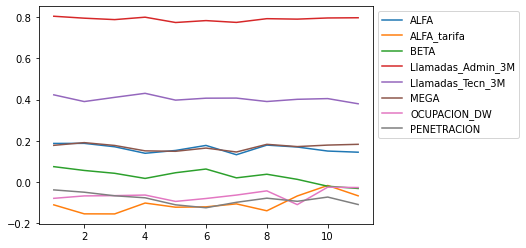

In [40]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [41]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [42]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,4473967.0
REGION OCCIDENTE,2634033.0
REGION NOROCCIDENTE,2068703.0
REGION ORIENTE,1557808.0
REGION COSTA,745964.0


In [43]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,4027102.0
CALI,987612.0
MEDELLIN,616278.0
PALMIRA,355674.0
PEREIRA,287982.0
BELLO,243685.0


In [44]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA OCCIDENTE,1067831.0
BOGOTA NORTE,1007017.0
BOGOTA SUR,987138.0
BOGOTA ORIENTE,965116.0


### Analisis regionales

In [45]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION NOROCCIDENTE',
 'REGION CENTRO',
 'REGION OCCIDENTE',
 'REGION COSTA',
 'REGION ORIENTE']

In [46]:
dic_resultados={}

In [47]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION NOROCCIDENTE
REGION CENTRO
REGION OCCIDENTE
REGION COSTA
REGION ORIENTE


In [48]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION NOROCCIDENTE
REGION CENTRO
REGION OCCIDENTE
REGION COSTA
REGION ORIENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
285,ALFA,0.162977
306,ALFA_tarifa,-0.120853
327,BETA,0.058231
348,Llamadas_Admin_3M,0.753386
369,Llamadas_Tecn_3M,0.399566
390,MEGA,0.154754
411,OCUPACION_DW,-0.068508
432,PENETRACION,-0.083597


In [50]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [51]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.162977,-0.120853,0.058231,0.753386,0.399566,0.154754,-0.068508,-0.083597
REGION NOROCCIDENTE,0.037106,-0.072813,0.016781,0.748996,0.373638,0.033228,-0.039189,-0.013981
REGION CENTRO,0.16091,-0.19339,0.067931,0.751355,0.420613,0.141438,-0.083401,-0.083513
REGION OCCIDENTE,0.199766,-0.062318,0.089749,0.761464,0.381774,0.178886,-0.058599,-0.131401
REGION COSTA,0.163341,-0.148775,0.074835,0.737839,0.388257,0.154056,-0.108763,-0.033737
REGION ORIENTE,0.233973,-0.073039,0.022963,0.767117,0.425077,0.245195,-0.049598,-0.134973


In [52]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.162977,-0.120853,0.058231,0.753386,0.399566,0.154754,-0.068508,-0.083597
REGION NOROCCIDENTE,0.037106,-0.072813,0.016781,0.748996,0.373638,0.033228,-0.039189,-0.013981
REGION CENTRO,0.16091,-0.19339,0.067931,0.751355,0.420613,0.141438,-0.083401,-0.083513
REGION OCCIDENTE,0.199766,-0.062318,0.089749,0.761464,0.381774,0.178886,-0.058599,-0.131401
REGION COSTA,0.163341,-0.148775,0.074835,0.737839,0.388257,0.154056,-0.108763,-0.033737
REGION ORIENTE,0.233973,-0.073039,0.022963,0.767117,0.425077,0.245195,-0.049598,-0.134973


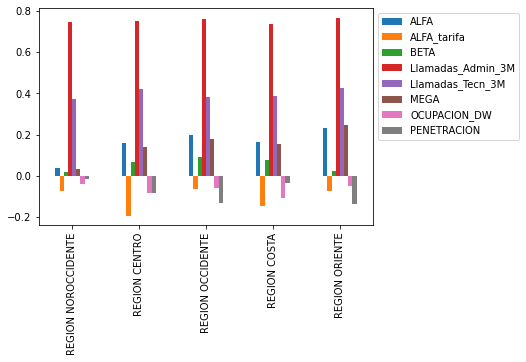

In [53]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [54]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [56]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.18693,-0.111164,0.07423,0.804333,0.42284,0.177693,-0.079545,-0.038556,NACIONAL
2,0.187349,-0.154839,0.055822,0.794941,0.390246,0.190869,-0.067776,-0.049777,NACIONAL
3,0.170747,-0.155156,0.041995,0.787995,0.410638,0.177147,-0.066383,-0.067097,NACIONAL
4,0.139167,-0.10239,0.017141,0.799753,0.430186,0.150931,-0.063501,-0.07693,NACIONAL
5,0.15289,-0.122575,0.044732,0.77394,0.397145,0.148788,-0.094461,-0.111023,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.209463,-0.045939,-0.042356,0.800662,0.50024,0.264439,0.002558,-0.089924,REGION ORIENTE
8,0.264456,0.000789,-0.003072,0.803085,0.369597,0.281549,-0.005623,-0.117437,REGION ORIENTE
9,0.182116,-0.056798,-0.028974,0.783351,0.364878,0.183532,-0.073077,-0.164765,REGION ORIENTE
10,0.247542,-0.017476,-0.00156,0.797388,0.388851,0.249509,0.010793,-0.098516,REGION ORIENTE


## Ciudades

In [57]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'PALMIRA', 'PEREIRA', 'BELLO'], dtype='object', name='CIUDAD')

In [58]:
dic_resultados_ciudad={}

In [59]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PALMIRA
PEREIRA
BELLO


In [60]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
PALMIRA
PEREIRA
BELLO


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [62]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.162977,-0.120853,0.058231,0.753386,0.399566,0.154754,-0.068508,-0.083597
BOGOTA,0.14077,-0.194854,0.061811,0.748714,0.417716,0.122167,-0.090121,-0.083034
CALI,0.234269,-0.109443,0.048834,0.770358,0.374746,0.24151,-0.0895,-0.126864
MEDELLIN,0.089083,-0.085099,0.072136,0.769281,0.393957,0.048203,-0.081483,-0.086363
PALMIRA,0.151794,0.030464,0.105769,0.78787,0.436231,0.112309,0.00495,-0.101697
PEREIRA,0.047744,0.109729,0.009104,0.742564,0.367412,0.042396,0.071759,0.065494
BELLO,-0.101108,NaN,-0.102387,0.756408,0.387493,-0.027534,0.006819,0.126473


In [63]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.162977,-0.120853,0.058231,0.753386,0.399566,0.154754,-0.068508,-0.083597
REGION NOROCCIDENTE,0.037106,-0.072813,0.016781,0.748996,0.373638,0.033228,-0.039189,-0.013981
REGION CENTRO,0.16091,-0.19339,0.067931,0.751355,0.420613,0.141438,-0.083401,-0.083513
REGION OCCIDENTE,0.199766,-0.062318,0.089749,0.761464,0.381774,0.178886,-0.058599,-0.131401
REGION COSTA,0.163341,-0.148775,0.074835,0.737839,0.388257,0.154056,-0.108763,-0.033737
REGION ORIENTE,0.233973,-0.073039,0.022963,0.767117,0.425077,0.245195,-0.049598,-0.134973
BOGOTA,0.14077,-0.194854,0.061811,0.748714,0.417716,0.122167,-0.090121,-0.083034
CALI,0.234269,-0.109443,0.048834,0.770358,0.374746,0.24151,-0.0895,-0.126864
MEDELLIN,0.089083,-0.085099,0.072136,0.769281,0.393957,0.048203,-0.081483,-0.086363
PALMIRA,0.151794,0.030464,0.105769,0.78787,0.436231,0.112309,0.00495,-0.101697


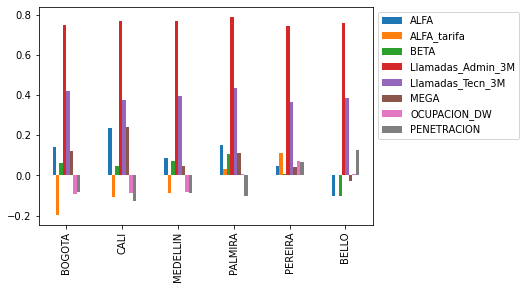

In [64]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [65]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


In [66]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.18693,-0.111164,0.07423,0.804333,0.42284,0.177693,-0.079545,-0.038556,NACIONAL
2,0.187349,-0.154839,0.055822,0.794941,0.390246,0.190869,-0.067776,-0.049777,NACIONAL
3,0.170747,-0.155156,0.041995,0.787995,0.410638,0.177147,-0.066383,-0.067097,NACIONAL
4,0.139167,-0.10239,0.017141,0.799753,0.430186,0.150931,-0.063501,-0.07693,NACIONAL
5,0.15289,-0.122575,0.044732,0.77394,0.397145,0.148788,-0.094461,-0.111023,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,-0.067289,NaN,-0.034274,0.858711,0.421747,-0.138607,-0.218453,0.047293,BELLO
8,-0.178995,NaN,-0.188917,0.802433,0.470892,-0.011533,0.058902,0.15754,BELLO
9,-0.139636,NaN,-0.132358,0.848038,0.429728,-0.017879,0.149074,0.271918,BELLO
10,-0.031428,NaN,-0.125864,0.82198,0.422457,0.129213,-0.013499,0.224002,BELLO


### Bogotá

In [67]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [68]:
dic_resultados_Bogota={}

In [69]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA NORTE
BOGOTA OCCIDENTE


In [70]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA NORTE
BOGOTA OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


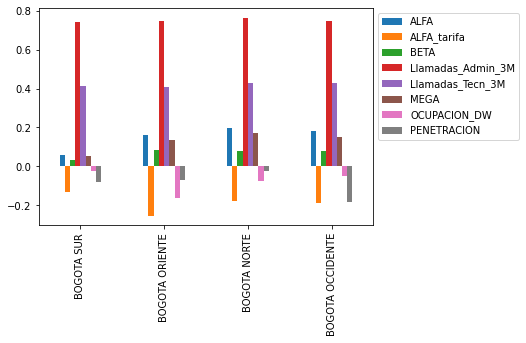

In [71]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [72]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA SUR,0.059914,-0.132812,0.034999,0.741854,0.413341,0.054164,-0.022572,-0.081077
BOGOTA ORIENTE,0.160681,-0.252706,0.082654,0.747722,0.408104,0.138238,-0.164783,-0.070713
BOGOTA NORTE,0.196711,-0.178104,0.077801,0.763606,0.431064,0.173638,-0.077523,-0.024332
BOGOTA OCCIDENTE,0.182822,-0.186499,0.076886,0.748824,0.426689,0.15049,-0.051623,-0.183348


In [73]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.162977,-0.120853,0.058231,0.753386,0.399566,0.154754,-0.068508,-0.083597
REGION NOROCCIDENTE,0.037106,-0.072813,0.016781,0.748996,0.373638,0.033228,-0.039189,-0.013981
REGION CENTRO,0.16091,-0.19339,0.067931,0.751355,0.420613,0.141438,-0.083401,-0.083513
REGION OCCIDENTE,0.199766,-0.062318,0.089749,0.761464,0.381774,0.178886,-0.058599,-0.131401
REGION COSTA,0.163341,-0.148775,0.074835,0.737839,0.388257,0.154056,-0.108763,-0.033737
REGION ORIENTE,0.233973,-0.073039,0.022963,0.767117,0.425077,0.245195,-0.049598,-0.134973
BOGOTA,0.14077,-0.194854,0.061811,0.748714,0.417716,0.122167,-0.090121,-0.083034
CALI,0.234269,-0.109443,0.048834,0.770358,0.374746,0.24151,-0.0895,-0.126864
MEDELLIN,0.089083,-0.085099,0.072136,0.769281,0.393957,0.048203,-0.081483,-0.086363
PALMIRA,0.151794,0.030464,0.105769,0.78787,0.436231,0.112309,0.00495,-0.101697


### Resultado Atemporal

In [74]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [75]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [76]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [77]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [78]:
data_reg=data_c0.copy()

In [79]:
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

In [80]:
data_reg.set_index('COD_NODO',inplace=True)

In [81]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [82]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.268801
ALFA                 0.008245
BETA                 0.004228
MEGA                 0.008064
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
PENETRACION          0.000000
OCUPACION_DW         0.001571
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [83]:
data_reg=data_reg.dropna()

In [84]:
colums_reg=list(data_reg.columns)

In [85]:
colums_reg.remove('FECHA')

In [86]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW',
 'ind_churn']

In [87]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [88]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [89]:
colums_reg.remove('ind_churn')

In [90]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [91]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs       pvalues           Features    VIF
0 -0.020478  9.878389e-24        ALFA_tarifa   7.89
1  0.004044  5.428341e-01               ALFA  24.77
2  0.025998  9.679730e-08               BETA  14.20
3  0.016310  6.228611e-04               MEGA  21.00
4  0.305240  0.000000e+00  Llamadas_Admin_3M   4.34
5  0.020169  3.180870e-17   Llamadas_Tecn_3M   2.03
6 -0.032640  1.831531e-59        PENETRACION   7.57
7 -0.024626  2.082935e-30       OCUPACION_DW  12.07
      coefs   pvalues Features    VIF
1  0.004044  0.542834     ALFA  24.77
2
      coefs       pvalues           Features    VIF
0 -0.020536  6.630236e-24        ALFA_tarifa   7.16
1  0.028530  3.200679e-29               BETA   4.47
2  0.018983  1.336531e-24               MEGA   3.65
3  0.305258  0.000000e+00  Llamadas_Admin_3M   4.31
4  0.020183  3.016832e-17   Llamadas_Tecn_3M   2.03
5 -0.032636  1.891026e-59        PENETRACION   7.25
6 -0.024625  2.085891e-30       OCUPACION_DW  11.34
      coefs       pvalues          F

,coefs,pvalues,Features,VIF
0,-0.020536,6.630236e-24,ALFA_tarifa,7.16
1,0.028530,3.200679e-29,BETA,4.47
2,0.018983,1.336531e-24,MEGA,3.65
3,0.305258,0.000000e+00,Llamadas_Admin_3M,4.31
4,0.020183,3.016832e-17,Llamadas_Tecn_3M,2.03
5,-0.032636,1.891026e-59,PENETRACION,7.25
6,-0.024625,2.085891e-30,OCUPACION_DW,11.34


In [92]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Nacional

In [93]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [94]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     4125.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:59:27   Log-Likelihood:                 37309.
No. Observations:               23986   AIC:                        -7.460e+04
Df Residuals:                   23978   BIC:                        -7.454e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0689      0.002     28.811      0.000       0.064       0.074
ALFA_tarifa          -0.0205      0.002    -10.093      0.000      -0.025      -0.017
BETA                  0.0285      0.003     11.236      0.000       0.024       0.034
MEGA                  0.0190      0.002     10.250      0.000       0.015       0.023
Llamadas_Admin_3M     0.3053      0.002    139.177      0.000       0.301       0.310
Llamadas_Tecn_3M      0.0202      0.002      8.452      0.000       0.016       0.025
PENETRACION          -0.0326      0.002    -16.305      0.000      -0.037      -0.029
OCUPACION_DW         -0.0246      0.002    -11.476      0.000      -0.029      -0.020
==============================================================================
Omnibus:                     5443.801   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32575.794
Skew:                           0.958   Prob(JB):                         0.00
Kurtosis:                       8.378   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,OCUPACION_DW,11.34
5,PENETRACION,7.25
0,ALFA_tarifa,7.16
1,BETA,4.47
3,Llamadas_Admin_3M,4.31
2,MEGA,3.65
4,Llamadas_Tecn_3M,2.03


In [96]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

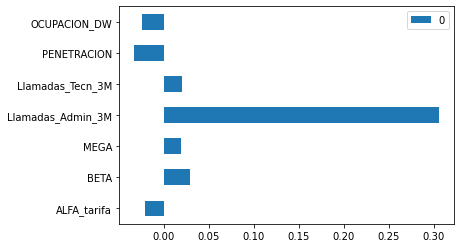

In [97]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [98]:
df_coef_nal

,coefs
const,0.068942
ALFA_tarifa,-0.020536
BETA,0.028530
MEGA,0.018983
Llamadas_Admin_3M,0.305258
Llamadas_Tecn_3M,0.020183
PENETRACION,-0.032636
OCUPACION_DW,-0.024625


In [99]:
df_vif_nal=vif

In [100]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [101]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.020536,0.02853,0.018983,0.305258,0.020183,-0.032636,-0.024625


In [102]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
index,,,,,,,
NACIONAL,-0.020536,0.02853,0.018983,0.305258,0.020183,-0.032636,-0.024625


## Regresión en el tiempo

In [103]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
0AR,0.778890,0.182763,0.306275,0.244973,0.298866,0.161307,0.542597,0.768002,0.138539,1
0BZ,0.437805,0.121863,0.224101,0.213580,0.651221,0.174749,0.405537,0.781215,0.184095,1
0DB,0.516353,0.142485,0.220332,0.253354,0.634665,0.083734,0.346507,0.809428,0.199518,1
0DD,0.543448,0.164647,0.219036,0.294254,0.101546,0.044658,0.391874,0.674773,0.037134,1
0RG,0.782465,0.104719,0.147030,0.258070,0.199111,0.000000,0.331350,0.640916,0.075713,1
...,...,...,...,...,...,...,...,...,...,...
ZH22,0.228549,0.402133,0.297117,0.553995,0.286719,0.094570,0.443665,0.327784,0.146935,11
ZR23B,0.448989,0.363450,0.235025,0.612523,0.460344,0.000000,0.171921,0.395919,0.168302,11
ZT1,0.308261,0.144846,0.213263,0.264671,0.470940,0.186399,0.232083,0.559180,0.223577,11


In [104]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [105]:
df_coef

,coefs,1,2,3,4,5,6,7,8,9,10,11
const,0.068942,0.047211,0.049426,0.049132,0.044438,0.070703,0.063790,0.073035,0.061961,0.085292,0.072989,0.047589
ALFA_tarifa,-0.020536,-0.011148,-0.023385,-0.018955,-0.004138,-0.016577,0.000658,-0.005645,-0.003536,-0.020265,-0.012977,-0.001445
BETA,0.028530,0.010758,0.002271,0.035492,0.008062,0.016978,0.019297,0.001885,0.001051,0.002625,-0.006837,-0.006433
MEGA,0.018983,0.027155,0.034451,0.020304,0.030094,0.022500,0.030901,0.024186,0.041086,0.016176,0.013583,0.038020
Llamadas_Admin_3M,0.305258,0.287269,0.269987,0.258663,0.296486,0.353929,0.375900,0.354922,0.373918,0.352799,0.398449,0.346354
Llamadas_Tecn_3M,0.020183,0.011880,-0.002378,0.002742,0.008986,0.004521,0.024804,0.027522,0.005467,0.017171,0.004602,-0.013700
PENETRACION,-0.032636,-0.013255,-0.019194,-0.020096,-0.019800,-0.041644,-0.042733,-0.029084,-0.033503,-0.042197,-0.034562,-0.025232
OCUPACION_DW,-0.024625,-0.024343,-0.017137,-0.023359,-0.023520,-0.026387,-0.035666,-0.031441,-0.019745,-0.024977,-0.021424,-0.017195


In [106]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
1,-0.011148,0.010758,0.027155,0.287269,0.011880,-0.013255,-0.024343
2,-0.023385,0.002271,0.034451,0.269987,-0.002378,-0.019194,-0.017137
3,-0.018955,0.035492,0.020304,0.258663,0.002742,-0.020096,-0.023359
4,-0.004138,0.008062,0.030094,0.296486,0.008986,-0.019800,-0.023520
5,-0.016577,0.016978,0.022500,0.353929,0.004521,-0.041644,-0.026387
6,0.000658,0.019297,0.030901,0.375900,0.024804,-0.042733,-0.035666
7,-0.005645,0.001885,0.024186,0.354922,0.027522,-0.029084,-0.031441
8,-0.003536,0.001051,0.041086,0.373918,0.005467,-0.033503,-0.019745
9,-0.020265,0.002625,0.016176,0.352799,0.017171,-0.042197,-0.024977
10,-0.012977,-0.006837,0.013583,0.398449,0.004602,-0.034562,-0.021424


In [107]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

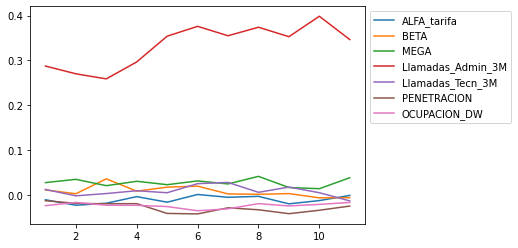

In [108]:
if conGraficos:
    ax = df_coef_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

## Analisis Específicos

In [109]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
0AR,0.778890,0.182763,0.306275,0.244973,0.298866,0.161307,0.542597,0.768002,0.138539,1
0BZ,0.437805,0.121863,0.224101,0.213580,0.651221,0.174749,0.405537,0.781215,0.184095,1
0DB,0.516353,0.142485,0.220332,0.253354,0.634665,0.083734,0.346507,0.809428,0.199518,1
0DD,0.543448,0.164647,0.219036,0.294254,0.101546,0.044658,0.391874,0.674773,0.037134,1
0RG,0.782465,0.104719,0.147030,0.258070,0.199111,0.000000,0.331350,0.640916,0.075713,1
...,...,...,...,...,...,...,...,...,...,...
ZH22,0.228549,0.402133,0.297117,0.553995,0.286719,0.094570,0.443665,0.327784,0.146935,11
ZR23B,0.448989,0.363450,0.235025,0.612523,0.460344,0.000000,0.171921,0.395919,0.168302,11
ZT1,0.308261,0.144846,0.213263,0.264671,0.470940,0.186399,0.232083,0.559180,0.223577,11


In [110]:
data_reg_nor=data_reg.copy()

In [111]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [112]:
data_reg_nor_temp=data_reg_nor.copy()

In [113]:
data_reg_nor.pop('FECHA')

COD_NODO
0AR       1
0BZ       1
0DB       1
0DD       1
0RG       1
         ..
ZH22     11
ZR23B    11
ZT1      11
ZT2      11
ZT3      11
Name: FECHA, Length: 25884, dtype: int64

## Regional

In [114]:
dic_resultados_reg={}

In [115]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION NOROCCIDENTE
REGION CENTRO
REGION OCCIDENTE
REGION COSTA
REGION ORIENTE


In [116]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION NOROCCIDENTE
REGION CENTRO
REGION OCCIDENTE
REGION COSTA
REGION ORIENTE


In [117]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [118]:
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.020536,0.028530,0.018983,0.305258,0.020183,-0.032636,-0.024625
REGION NOROCCIDENTE,-0.045783,0.021439,0.039843,0.324548,0.022993,0.012992,-0.022913
REGION CENTRO,-0.044212,0.029493,0.011337,0.281524,0.024216,-0.026385,-0.025290
REGION OCCIDENTE,-0.007153,0.040996,0.035337,0.360852,0.044276,-0.029041,-0.017622
REGION COSTA,-0.036235,0.018816,0.007632,0.288793,-0.003357,-0.008298,-0.044296
REGION ORIENTE,-0.040870,0.019629,0.014141,0.302607,0.054829,-0.052199,0.003299


In [119]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.020536,0.028530,0.018983,0.305258,0.020183,-0.032636,-0.024625
REGION NOROCCIDENTE,-0.045783,0.021439,0.039843,0.324548,0.022993,0.012992,-0.022913
REGION CENTRO,-0.044212,0.029493,0.011337,0.281524,0.024216,-0.026385,-0.025290
REGION OCCIDENTE,-0.007153,0.040996,0.035337,0.360852,0.044276,-0.029041,-0.017622
REGION COSTA,-0.036235,0.018816,0.007632,0.288793,-0.003357,-0.008298,-0.044296
REGION ORIENTE,-0.040870,0.019629,0.014141,0.302607,0.054829,-0.052199,0.003299


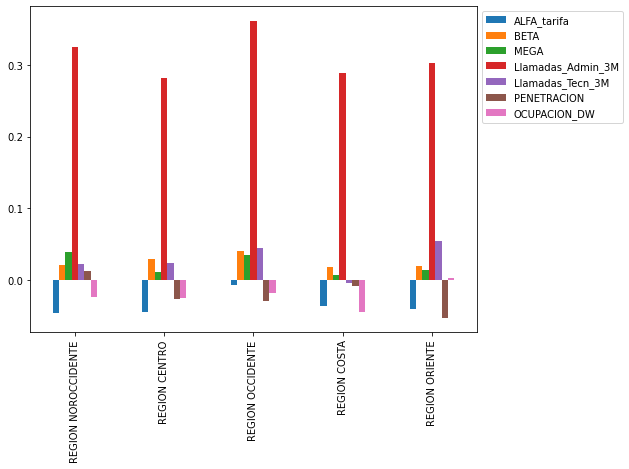

In [120]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [121]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [122]:
DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [123]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011148,0.010758,0.027155,0.287269,0.011880,-0.013255,-0.024343,NACIONAL
2,-0.023385,0.002271,0.034451,0.269987,-0.002378,-0.019194,-0.017137,NACIONAL
3,-0.018955,0.035492,0.020304,0.258663,0.002742,-0.020096,-0.023359,NACIONAL
4,-0.004138,0.008062,0.030094,0.296486,0.008986,-0.019800,-0.023520,NACIONAL
5,-0.016577,0.016978,0.022500,0.353929,0.004521,-0.041644,-0.026387,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.034401,0.025887,0.038155,0.364495,0.114888,-0.018265,0.015374,REGION ORIENTE
8,-0.003902,0.030073,0.052521,0.360734,0.062947,-0.037989,0.002909,REGION ORIENTE
9,-0.032678,-0.015024,0.000718,0.366233,-0.010869,-0.054400,0.020230,REGION ORIENTE
10,-0.023795,0.015421,0.023819,0.344672,0.079525,-0.036748,0.035842,REGION ORIENTE


## Ciudades

In [124]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PALMIRA
PEREIRA
BELLO


In [125]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PALMIRA
PEREIRA


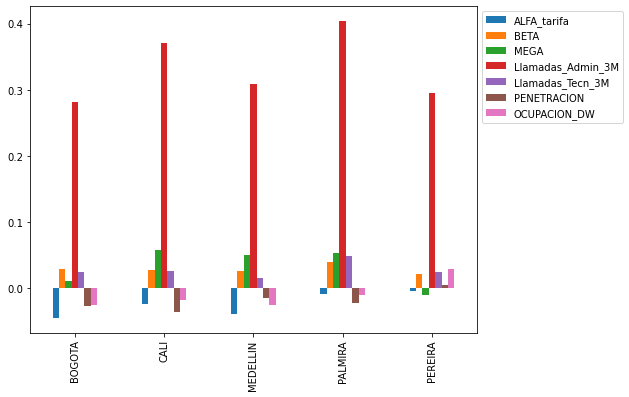

In [126]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [127]:
df_coef_T[1:]

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
BOGOTA,-0.044323,0.029447,0.011213,0.281414,0.024422,-0.026422,-0.025000
CALI,-0.022906,0.027927,0.058216,0.371081,0.026656,-0.035360,-0.017247
MEDELLIN,-0.038973,0.026943,0.050323,0.309523,0.015645,-0.014099,-0.025401
PALMIRA,-0.008935,0.039258,0.053349,0.403703,0.048453,-0.021511,-0.010060
PEREIRA,-0.004271,0.021014,-0.009446,0.294938,0.025028,0.005213,0.029163


In [128]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.020536,0.028530,0.018983,0.305258,0.020183,-0.032636,-0.024625
REGION NOROCCIDENTE,-0.045783,0.021439,0.039843,0.324548,0.022993,0.012992,-0.022913
REGION CENTRO,-0.044212,0.029493,0.011337,0.281524,0.024216,-0.026385,-0.025290
REGION OCCIDENTE,-0.007153,0.040996,0.035337,0.360852,0.044276,-0.029041,-0.017622
REGION COSTA,-0.036235,0.018816,0.007632,0.288793,-0.003357,-0.008298,-0.044296
REGION ORIENTE,-0.040870,0.019629,0.014141,0.302607,0.054829,-0.052199,0.003299
BOGOTA,-0.044323,0.029447,0.011213,0.281414,0.024422,-0.026422,-0.025000
CALI,-0.022906,0.027927,0.058216,0.371081,0.026656,-0.035360,-0.017247
MEDELLIN,-0.038973,0.026943,0.050323,0.309523,0.015645,-0.014099,-0.025401
PALMIRA,-0.008935,0.039258,0.053349,0.403703,0.048453,-0.021511,-0.010060


#### Analisis temporal

In [129]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
DataSetEntregable_totales_temp_reg

## Bogota

In [130]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA NORTE
BOGOTA OCCIDENTE


In [131]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA NORTE
BOGOTA OCCIDENTE


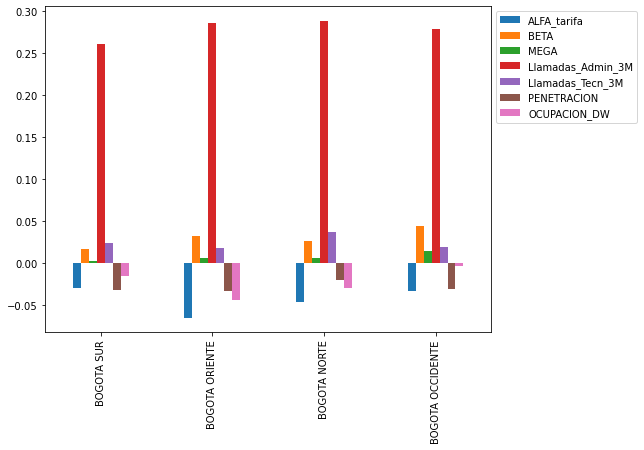

In [132]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [133]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.020536,0.028530,0.018983,0.305258,0.020183,-0.032636,-0.024625
REGION NOROCCIDENTE,-0.045783,0.021439,0.039843,0.324548,0.022993,0.012992,-0.022913
REGION CENTRO,-0.044212,0.029493,0.011337,0.281524,0.024216,-0.026385,-0.025290
REGION OCCIDENTE,-0.007153,0.040996,0.035337,0.360852,0.044276,-0.029041,-0.017622
REGION COSTA,-0.036235,0.018816,0.007632,0.288793,-0.003357,-0.008298,-0.044296
REGION ORIENTE,-0.040870,0.019629,0.014141,0.302607,0.054829,-0.052199,0.003299
BOGOTA,-0.044323,0.029447,0.011213,0.281414,0.024422,-0.026422,-0.025000
CALI,-0.022906,0.027927,0.058216,0.371081,0.026656,-0.035360,-0.017247
MEDELLIN,-0.038973,0.026943,0.050323,0.309523,0.015645,-0.014099,-0.025401
PALMIRA,-0.008935,0.039258,0.053349,0.403703,0.048453,-0.021511,-0.010060


### Analisis Temporal

In [134]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [135]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011148,0.010758,0.027155,0.287269,0.011880,-0.013255,-0.024343,NACIONAL
2,-0.023385,0.002271,0.034451,0.269987,-0.002378,-0.019194,-0.017137,NACIONAL
3,-0.018955,0.035492,0.020304,0.258663,0.002742,-0.020096,-0.023359,NACIONAL
4,-0.004138,0.008062,0.030094,0.296486,0.008986,-0.019800,-0.023520,NACIONAL
5,-0.016577,0.016978,0.022500,0.353929,0.004521,-0.041644,-0.026387,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.006578,0.008327,0.011314,0.323648,0.012827,-0.039684,0.013375,BOGOTA OCCIDENTE
8,-0.041127,0.007797,0.034456,0.312009,-0.005249,-0.019363,0.005945,BOGOTA OCCIDENTE
9,-0.051278,0.025342,0.003111,0.295116,0.054949,-0.057525,0.001091,BOGOTA OCCIDENTE
10,-0.039568,0.019928,0.009839,0.359798,-0.025709,-0.039809,0.008617,BOGOTA OCCIDENTE


In [136]:
### Guardar Archivo

In [137]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [138]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

## Resultados

In [139]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011148,0.010758,0.027155,0.287269,0.011880,-0.013255,-0.024343,NACIONAL
2,-0.023385,0.002271,0.034451,0.269987,-0.002378,-0.019194,-0.017137,NACIONAL
3,-0.018955,0.035492,0.020304,0.258663,0.002742,-0.020096,-0.023359,NACIONAL
4,-0.004138,0.008062,0.030094,0.296486,0.008986,-0.019800,-0.023520,NACIONAL
5,-0.016577,0.016978,0.022500,0.353929,0.004521,-0.041644,-0.026387,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.006578,0.008327,0.011314,0.323648,0.012827,-0.039684,0.013375,BOGOTA OCCIDENTE
8,-0.041127,0.007797,0.034456,0.312009,-0.005249,-0.019363,0.005945,BOGOTA OCCIDENTE
9,-0.051278,0.025342,0.003111,0.295116,0.054949,-0.057525,0.001091,BOGOTA OCCIDENTE
10,-0.039568,0.019928,0.009839,0.359798,-0.025709,-0.039809,0.008617,BOGOTA OCCIDENTE
